In [404]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

#Code Loading

In [405]:
data_path = "cases_malaysia_covid.csv"  # Update with the correct file path

df = pd.read_csv(data_path, index_col = 'date')


In [406]:
df.isnull()

,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,cases_child,...,cases_60_69,cases_70_79,cases_80,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
date,,,,,,,,,,,,,,,,,,,,,
25/1/2020,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26/1/2020,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
27/1/2020,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28/1/2020,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29/1/2020,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10/3/2022,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11/3/2022,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12/3/2022,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [407]:
df.replace('?', np.nan, inplace=True)

In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 780 entries, 25/1/2020 to 14/3/2022
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   cases_new                780 non-null    int64
 1   cases_import             780 non-null    int64
 2   cases_recovered          780 non-null    int64
 3   cases_active             780 non-null    int64
 4   cases_cluster            780 non-null    int64
 5   cases_unvax              780 non-null    int64
 6   cases_pvax               780 non-null    int64
 7   cases_fvax               780 non-null    int64
 8   cases_boost              780 non-null    int64
 9   cases_child              780 non-null    int64
 10  cases_adolescent         780 non-null    int64
 11  cases_adult              780 non-null    int64
 12  cases_elderly            780 non-null    int64
 13  cases_0_4                780 non-null    int64
 14  cases_5_11               780 non-null    int64
 1

In [409]:
df.fillna(0, inplace=True)

In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 780 entries, 25/1/2020 to 14/3/2022
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   cases_new                780 non-null    int64
 1   cases_import             780 non-null    int64
 2   cases_recovered          780 non-null    int64
 3   cases_active             780 non-null    int64
 4   cases_cluster            780 non-null    int64
 5   cases_unvax              780 non-null    int64
 6   cases_pvax               780 non-null    int64
 7   cases_fvax               780 non-null    int64
 8   cases_boost              780 non-null    int64
 9   cases_child              780 non-null    int64
 10  cases_adolescent         780 non-null    int64
 11  cases_adult              780 non-null    int64
 12  cases_elderly            780 non-null    int64
 13  cases_0_4                780 non-null    int64
 14  cases_5_11               780 non-null    int64
 1

In [411]:
columns_to_convert = ['cases_new']

df[columns_to_convert] = df[columns_to_convert].astype(float)

In [412]:
date_time = df.index

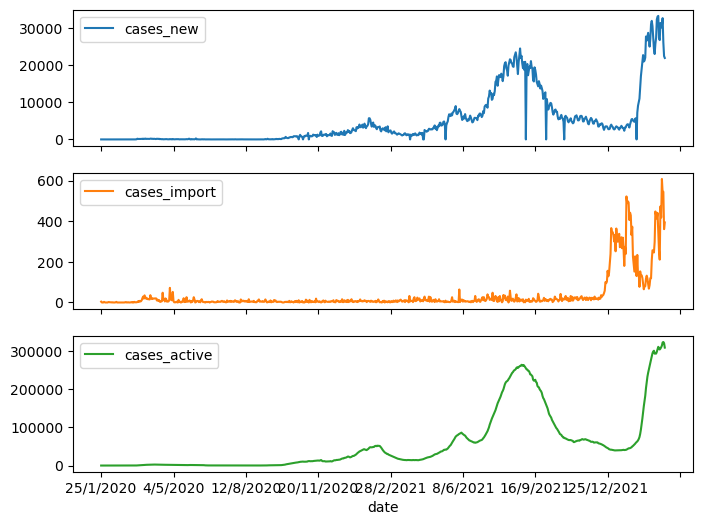

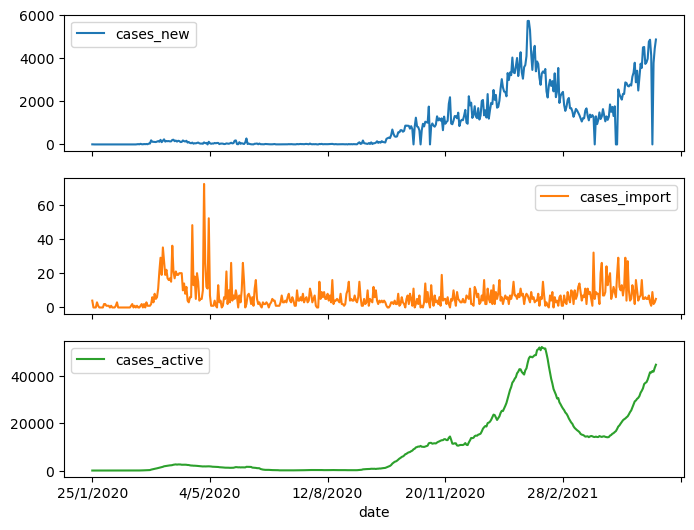

In [413]:
plot_cols = ['cases_new','cases_import', 'cases_active']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [414]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cases_new,780.0,4859.232051,7103.536174,0.0,57.00,2044.5,5736.50,33406.0
cases_import,780.0,36.506410,91.179498,0.0,3.00,7.0,17.00,608.0
cases_recovered,780.0,4490.717949,6476.225456,0.0,64.75,1884.0,5422.50,33872.0
cases_active,780.0,55257.164103,77917.955395,1.0,1418.75,21990.0,66035.00,323618.0
cases_cluster,780.0,666.317949,787.821113,0.0,36.75,376.0,995.25,3394.0
cases_unvax,780.0,2405.275641,3044.223371,0.0,76.50,1211.0,3631.00,12684.0
cases_pvax,780.0,522.898718,1439.910614,0.0,0.00,0.0,122.50,7313.0
cases_fvax,780.0,1435.550000,2661.340076,0.0,0.00,0.0,2223.00,13079.0
cases_boost,780.0,566.533333,2500.686998,0.0,0.00,0.0,0.00,18123.0
cases_child,780.0,656.387179,987.153972,0.0,3.00,157.5,829.25,4389.0


Text(0, 0.5, 'new cases')

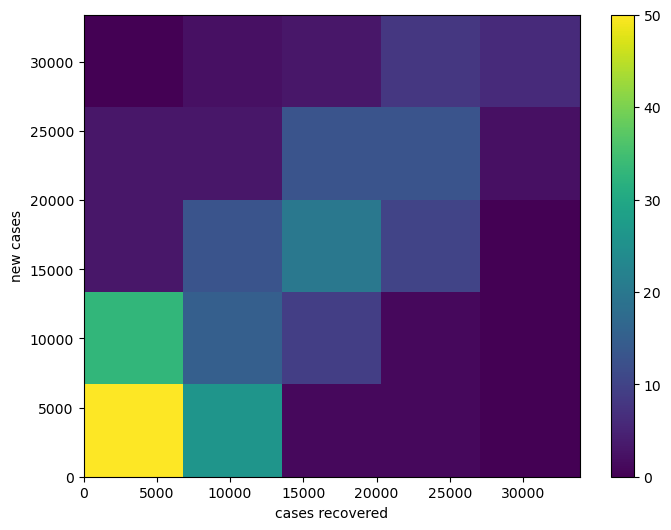

In [415]:
plt.hist2d(df['cases_recovered'], df['cases_new'], bins=(5, 5), vmax=50)
plt.colorbar()
plt.xlabel('cases recovered')
plt.ylabel('new cases')

In [416]:
from sklearn.model_selection import train_test_split

X = df.drop(['cases_new','cases_import','cases_recovered','cases_active'], axis=1)
y = df[['cases_new','cases_import','cases_recovered','cases_active']]

In [417]:
X.head()

,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,cases_child,cases_adolescent,cases_adult,cases_elderly,cases_0_4,...,cases_60_69,cases_70_79,cases_80,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
date,,,,,,,,,,,,,,,,,,,,,
25/1/2020,0,4,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
26/1/2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27/1/2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28/1/2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29/1/2020,0,3,0,0,0,1,0,2,0,1,...,0,0,0,0,0,0,0,0,0,0


In [418]:
y.head()

,cases_new,cases_import,cases_recovered,cases_active
date,,,,
25/1/2020,4.0,4,0,4
26/1/2020,0.0,0,0,4
27/1/2020,0.0,0,0,4
28/1/2020,0.0,0,0,4
29/1/2020,3.0,3,0,7


In [419]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.5, random_state=42)

In [420]:
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (390, 26)
X_test:  (390, 26)
y_train:  (390, 4)
y_test:  (390, 4)


In [421]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [422]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(30,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [423]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 50)                10400     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [424]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [425]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

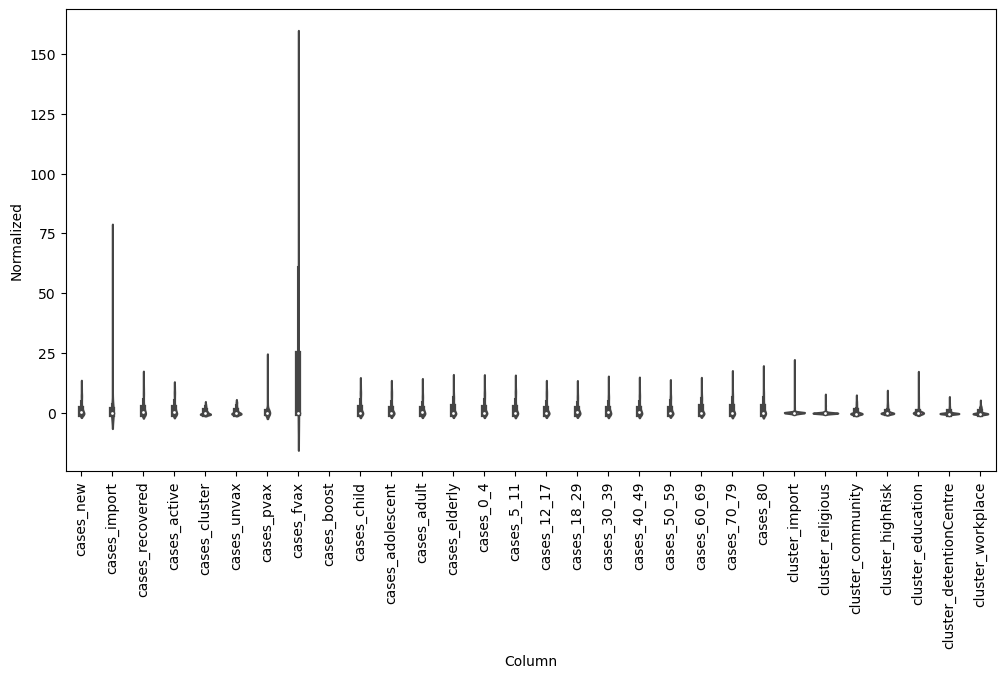

In [426]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [427]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [428]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['cases_new'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['cases_new']

In [429]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['cases_new'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['cases_new']

In [430]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [431]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 30)
Inputs shape: (3, 6, 30)
Labels shape: (3, 1, 1)


In [432]:
w2.example = example_inputs, example_labels

In [433]:
def plot(self, model=None, plot_col='cases_new', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time')

WindowGenerator.plot = plot

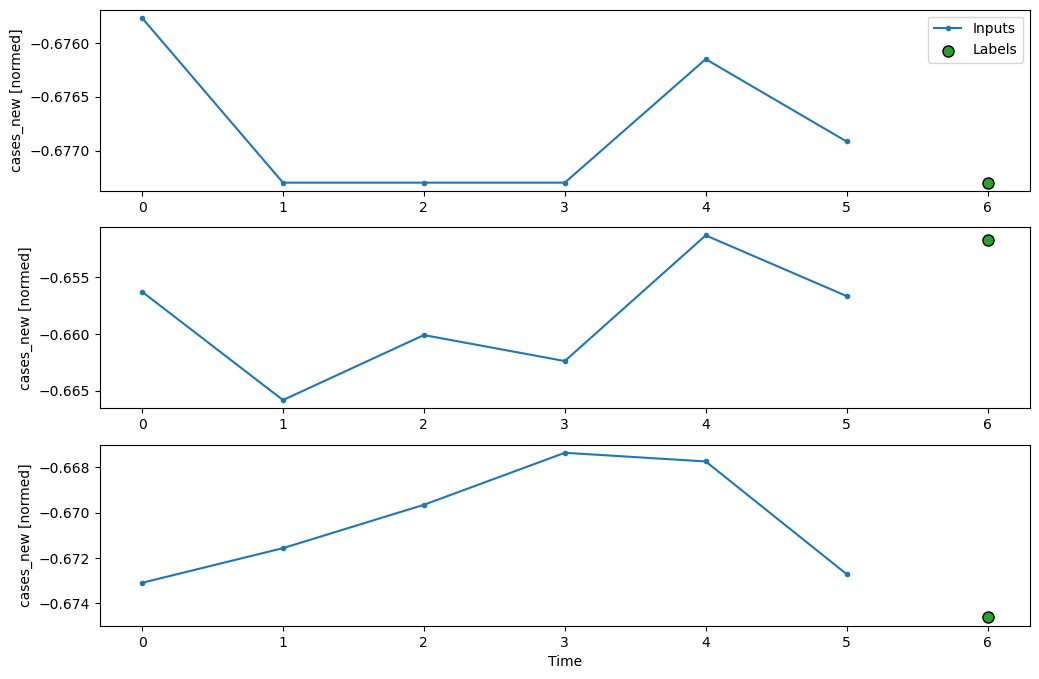

In [434]:
w2.plot()

In [435]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [436]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [441]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['cases_new'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['cases_new']

In [438]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [442]:
baseline = Baseline(label_index=column_indices['cases_new'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

5/5 [==============================] - 0s 1000us/step - loss: 1.2641 - mean_absolute_error: 0.5005


In [444]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['cases_new'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['cases_new']

In [445]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 30)
Output shape: (32, 24, 1)


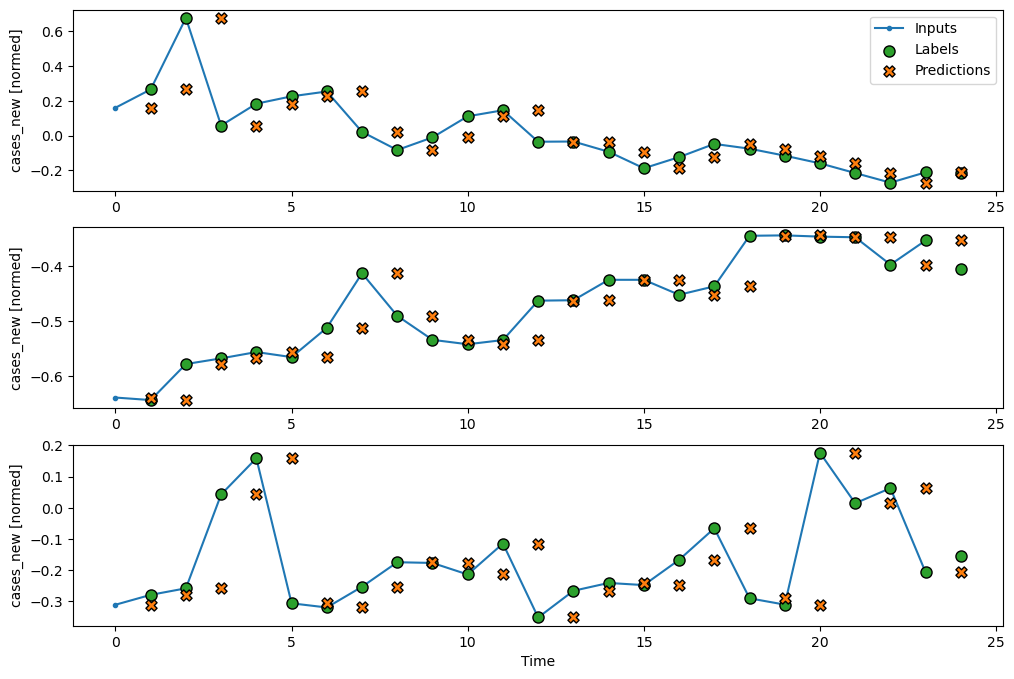

In [446]:
wide_window.plot(baseline)

In [447]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [448]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 30)
Output shape: (32, 1, 1)


In [449]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [450]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [451]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
18/18 [==============================] - 1s 15ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 2/20
5/5 [==============================] - 0s 750us/step - loss: nan - mean_absolute_error: nan


In [452]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', linear(wide_window.example[0]).shape)

Input shape: (32, 24, 30)
Output shape: (32, 24, 1)


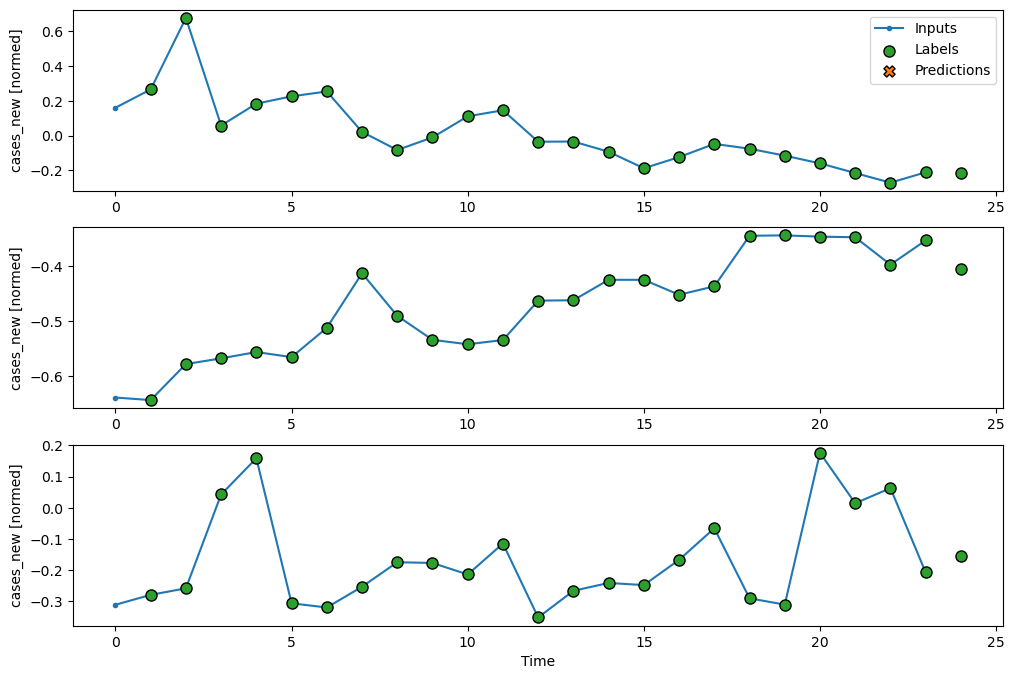

In [453]:
wide_window.plot(linear)

In [455]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
18/18 [==============================] - 1s 14ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 2/20
5/5 [==============================] - 0s 1ms/step - loss: nan - mean_absolute_error: nan


In [457]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['cases_new'])

conv_window


Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['cases_new']

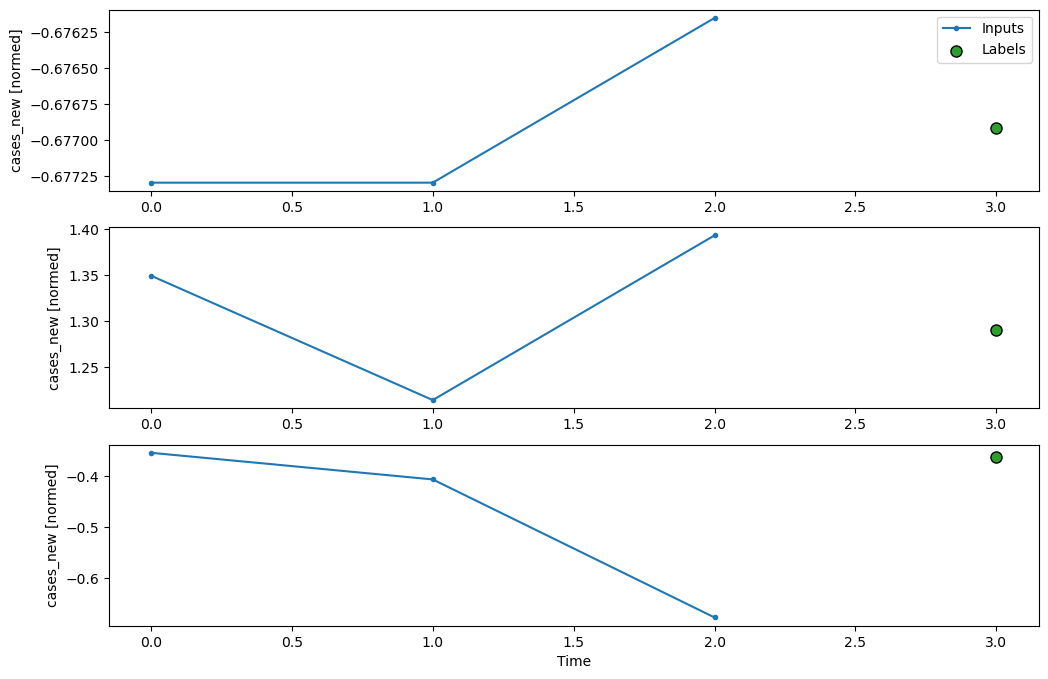

In [459]:
conv_window.plot()

In [460]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [461]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 30)
Output shape: (32, 1, 1)


In [462]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

5/5 [==============================] - 0s 1000us/step - loss: 19.2353 - mean_absolute_error: 3.5340


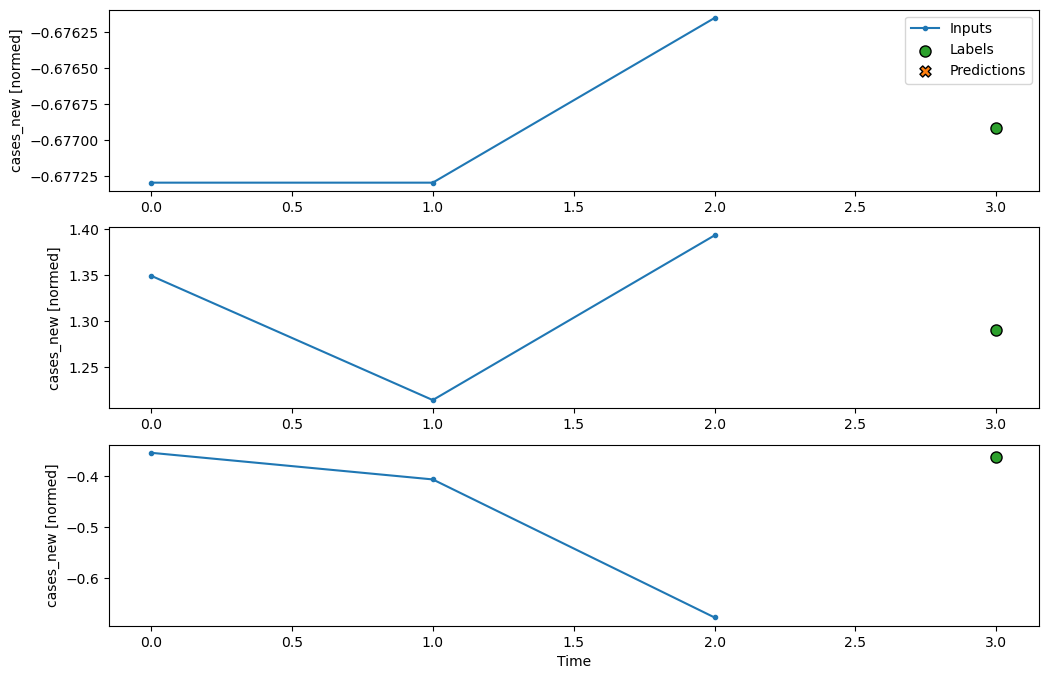

In [463]:
conv_window.plot(multi_step_dense)

In [465]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 30)
Labels shape (batch, time, features): (32, 24, 30)


In [466]:
baseline = Baseline()
baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [467]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

5/5 [==============================] - 0s 750us/step - loss: nan - mean_absolute_error: nan


In [468]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])

In [469]:
history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

5/5 [==============================] - 0s 1ms/step - loss: nan - mean_absolute_error: nan


In [470]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

print()

5/5 [==============================] - 0s 2ms/step - loss: nan - mean_absolute_error: nan

CPU times: total: 9.11 s
Wall time: 3.04 s


In [471]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each time step is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

In [472]:
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small.
        # Therefore, initialize the output layer with zeros.
        kernel_initializer=tf.initializers.zeros())
]))

history = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)
print()

5/5 [==============================] - 0s 2ms/step - loss: nan - mean_absolute_error: nan

CPU times: total: 8.77 s
Wall time: 2.76 s
